## TA 1 

> sharvari soparkar
 
> D3_12

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Display the shape of the loaded data
print("Training images shape:", X_train.shape)
print("Training labels shape:", Y_train.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", Y_test.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [22]:
# X train is 60000 rows of 28×28 values: we reshape it to # 60000 × 784.
RESHAPED = 784 # 28×28 = 784 neurons
X_train = X_train. reshape (60000, RESHAPED)
X_test = X_test.reshape (10000, RESHAPED)
# Data is converted into float32 to use 32-bit precision # when training a neural network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalizing the input to be within the range [0,1]
X_train /= 255
X_test /= 255 
print(X_train.shape, 'train samples') 
print(X_test. shape,'test samples')
# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical (Y_train, 10)
Y_test = tf.keras.utils.to_categorical (Y_test, 10)

(60000, 784) train samples
(10000, 784) test samples


In [23]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential 
model_0 = Sequential ()

### MODEL 0 

In [5]:
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape

model_0.add(Dense (10, input_shape= (784,), name= 'dense_layer', activation='softmax'))

In [6]:
# Compiling the model.
model_0.compile(optimizer='SGD' ,loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Training the model.
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 1s 944us/step - loss: 1.0449 - accuracy: 0.6739 - val_loss: 0.7591 - val_accuracy: 0.7574
Epoch 2/70
750/750 [==============================] - 1s 815us/step - loss: 0.7056 - accuracy: 0.7729 - val_loss: 0.6545 - val_accuracy: 0.7881
Epoch 3/70
750/750 [==============================] - 1s 803us/step - loss: 0.6332 - accuracy: 0.7972 - val_loss: 0.6079 - val_accuracy: 0.7998
Epoch 4/70
750/750 [==============================] - 1s 772us/step - loss: 0.5942 - accuracy: 0.8087 - val_loss: 0.5782 - val_accuracy: 0.8083
Epoch 5/70
750/750 [==============================] - 1s 1ms/step - loss: 0.5685 - accuracy: 0.8165 - val_loss: 0.5618 - val_accuracy: 0.8138
Epoch 6/70
750/750 [==============================] - 1s 906us/step - loss: 0.5500 - accuracy: 0.8212 - val_loss: 0.5436 - val_accuracy: 0.8171
Epoch 7/70
750/750 [==============================] - 1s 727us/step - loss: 0.5355 - accuracy: 0.8253 - val_loss: 0.5304 - val_accuracy: 0

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
# list all data in training
print(training.history.keys ())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


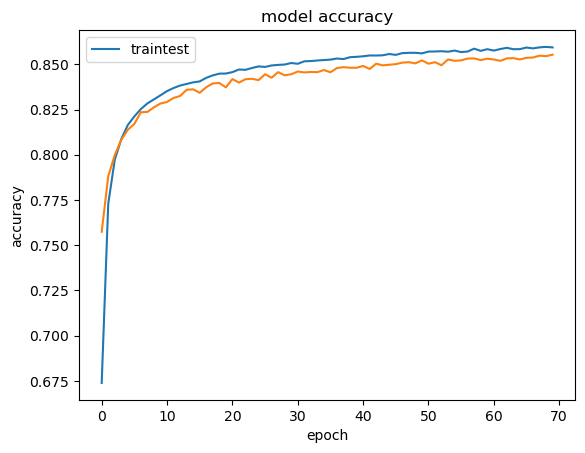

In [9]:
# summarize training for accuracy
plt.plot(training.history ['accuracy'])
plt.plot(training.history ['val_accuracy'])
plt.title('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt. legend (['train'
'test'], loc= 'upper left')
plt.show()

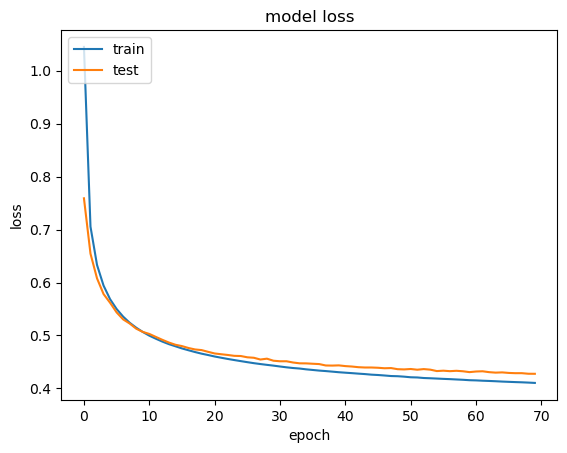

In [10]:
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt. legend(['train',
'test'], loc='upper left')
plt.show()

In [11]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 543us/step - loss: 0.4550 - accuracy: 0.8404
Test accuracy: 0.840399980545044


In [12]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### MODEL 2 : ADDING DROPOUT TO AVOID OVERFITTING
> MODEL 2 ACCURACY 87.4199 %

In [95]:
from tensorflow.keras.layers import Dropout
#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential ()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape= (784,), activation = 'relu'))
model_2.add(Dropout (0.3))
# Adding another dense layer:
model_2.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout (0.3))
# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense (10, name='dense_layer_3', activation = 'softmax'))

In [96]:
# Compiling the model.
model_2.compile(optimizer= 'SGD',loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
# Training the model.
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 1s 2ms/step - loss: 1.2359 - accuracy: 0.5700 - val_loss: 0.7288 - val_accuracy: 0.7486
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.7938 - accuracy: 0.7196 - val_loss: 0.6053 - val_accuracy: 0.7918
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.6845 - accuracy: 0.7626 - val_loss: 0.5438 - val_accuracy: 0.8142
Epoch 4/50
750/750 [==============================] - 1s 1ms/step - loss: 0.6199 - accuracy: 0.7858 - val_loss: 0.5086 - val_accuracy: 0.8239
Epoch 5/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5830 - accuracy: 0.7970 - val_loss: 0.4840 - val_accuracy: 0.8283
Epoch 6/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.8085 - val_loss: 0.4640 - val_accuracy: 0.8372
Epoch 7/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.8150 - val_loss: 0.4492 - val_accuracy: 0.8385
Epoch 

In [104]:
import matplotlib.pyplot as plt 
%matplotlib inline
# list all data in training
print(training.history.keys ())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


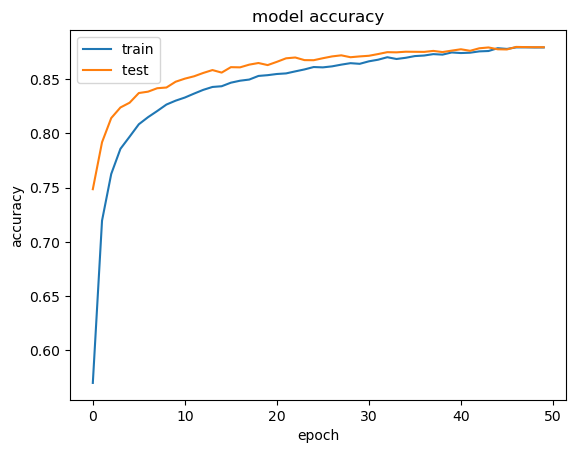

In [105]:
# summarize training for accuracy
plt.plot (training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt. legend(['train', 'test '], loc='upper left') 
plt. show()

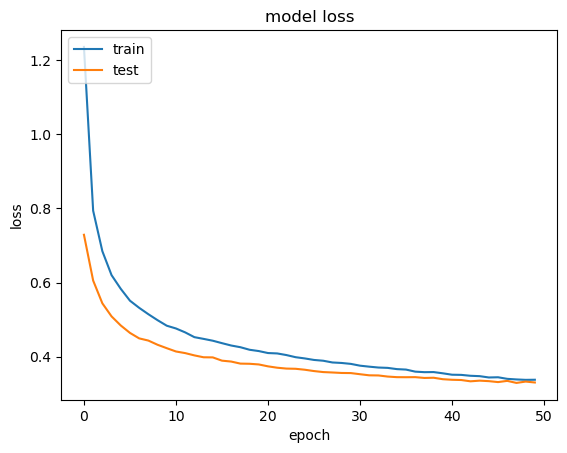

In [106]:
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel ('epoch')
plt. legend(['train', 'test'], loc='upper left') 
plt.show()

In [107]:
model_2.weights[0]

<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-0.02709152, -0.02568648,  0.01823496, ..., -0.02032799,
         0.0547707 , -0.06471273],
       [ 0.07039621,  0.01126471,  0.02307509, ..., -0.00879822,
         0.04116338, -0.01538465],
       [ 0.0790709 ,  0.0638352 ,  0.05788997, ..., -0.01132337,
         0.06499146,  0.05307713],
       ...,
       [ 0.04166329, -0.0396344 , -0.03508361, ..., -0.01648571,
        -0.0522165 , -0.01637207],
       [ 0.06105496,  0.00448771,  0.0260838 , ..., -0.07785783,
        -0.05249017,  0.0442642 ],
       [-0.05283632,  0.0274819 , -0.04946024, ..., -0.01225941,
         0.01316366, -0.01488622]], dtype=float32)>

In [108]:
#evaluate the model
test_loss, test_acc = model_2.evaluate (X_test, Y_test)
print ('Test accuracy:', test_acc)

313/313 [==============================] - 0s 891us/step - loss: 0.3526 - accuracy: 0.8742
Test accuracy: 0.8741999864578247


In [109]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### MODEL 3 : ADDING DROPOUT TO AVOID OVERFITTING & OPTIMIZER AS ADAM
> MODEL 3 ACCURACY : 87.97 % 
>loss: 0.3389

In [112]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential ()
N_hidden = 128

model_3.add(Dense(N_hidden, name='dense_layer',input_shape= (784,), activation = 'relu'))
model_3.add(Dropout (0.3))

model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu')) 
model_3.add(Dropout (0.3))

model_3.add(Dense(N_hidden, name='dense_layer_3', activation='relu')) 
model_3.add(Dropout (0.3))

model_3.add(Dense(10, name='dense_layer_4', activation = 'softmax'))

In [113]:
# Compiling the model.
model_3.compile(optimizer='Adam',loss='categorical_crossentropy', metrics= ['accuracy'])

In [114]:
# Training the model.
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=25, validation_split=0.2)

Epoch 1/25
375/375 [==============================] - 1s 3ms/step - loss: 0.7685 - accuracy: 0.7231 - val_loss: 0.4481 - val_accuracy: 0.8375
Epoch 2/25
375/375 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.8260 - val_loss: 0.4092 - val_accuracy: 0.8497
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.8428 - val_loss: 0.3777 - val_accuracy: 0.8654
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.4179 - accuracy: 0.8520 - val_loss: 0.3615 - val_accuracy: 0.8680
Epoch 5/25
375/375 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.8556 - val_loss: 0.3567 - val_accuracy: 0.8729
Epoch 6/25
375/375 [==============================] - 1s 2ms/step - loss: 0.3834 - accuracy: 0.8630 - val_loss: 0.3498 - val_accuracy: 0.8751
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.3728 - accuracy: 0.8664 - val_loss: 0.3560 - val_accuracy: 0.8710
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


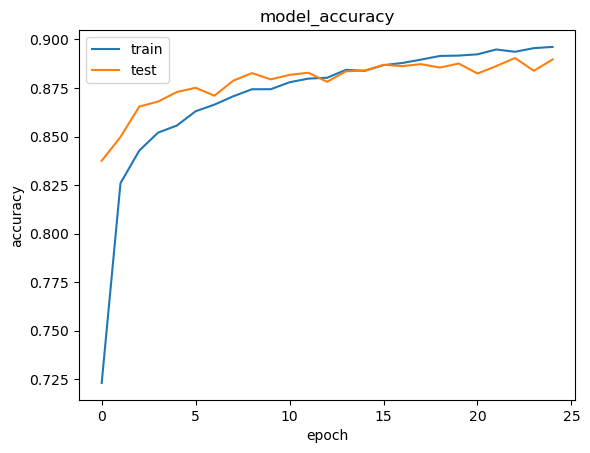

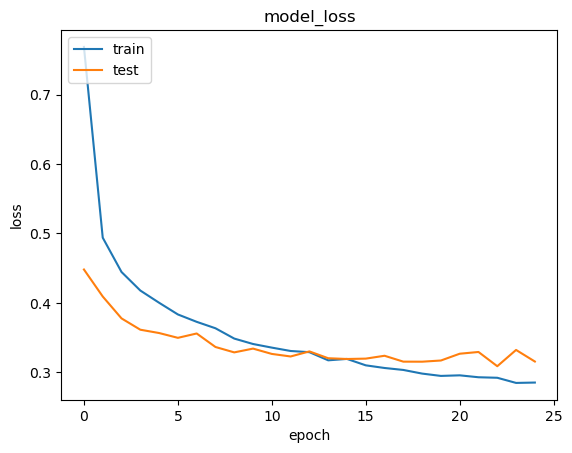

In [115]:
import matplotlib.pyplot as plt 
%matplotlib inline
# list all data in training
print (training.history.keys ())
# summarize training for accuracy
plt.plot(training.history ['accuracy'])
plt.plot (training.history ['val_accuracy' ])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='upper left') 
plt.show ()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model_loss')
plt.ylabel ('loss')
plt.xlabel ('epoch')
plt. legend(['train', 'test'], loc='upper left') 
plt.show ()

In [116]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 726us/step - loss: 0.3389 - accuracy: 0.8797
Test accuracy: 0.8797000050544739


In [45]:
model_3.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x164dece50>>

### MODEL 4 : ADDING MORE HIDDEN LAYERS

> loss: 0.3211 
Test accuracy: 88.84999 %


In [24]:
from tensorflow.keras.layers import Dropout
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential ()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape= (784,), activation = 'relu'))
model_4.add(Dropout (0.2))
# Adding another dense layer:
model_4.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout (0.2))

model_4.add(Dense (N_hidden, name='dense_layer_3', activation='relu'))
model_4.add(Dropout (0.2))

model_4.add(Dense (N_hidden, name='dense_layer_4', activation='relu'))
model_4.add(Dropout (0.2))

# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense (10, name='dense_layer_5', activation = 'softmax'))

In [27]:
# Compiling the model.
model_4.compile(optimizer='Adam',loss='categorical_crossentropy', metrics= ['accuracy'])

In [28]:
# Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 12ms/step - loss: 0.5751 - accuracy: 0.7922 - val_loss: 0.4456 - val_accuracy: 0.8322
Epoch 2/20
375/375 [==============================] - 6s 15ms/step - loss: 0.4123 - accuracy: 0.8508 - val_loss: 0.4400 - val_accuracy: 0.8428
Epoch 3/20
375/375 [==============================] - 4s 12ms/step - loss: 0.3726 - accuracy: 0.8629 - val_loss: 0.3991 - val_accuracy: 0.8528
Epoch 4/20
375/375 [==============================] - 4s 12ms/step - loss: 0.3557 - accuracy: 0.8697 - val_loss: 0.3460 - val_accuracy: 0.8737
Epoch 5/20
375/375 [==============================] - 5s 12ms/step - loss: 0.3374 - accuracy: 0.8761 - val_loss: 0.3541 - val_accuracy: 0.8737
Epoch 6/20
375/375 [==============================] - 5s 13ms/step - loss: 0.3243 - accuracy: 0.8799 - val_loss: 0.3164 - val_accuracy: 0.8845
Epoch 7/20
375/375 [==============================] - 4s 12ms/step - loss: 0.3150 - accuracy: 0.8835 - val_loss: 0.3216 - val_accuracy: 0.8842

In [30]:
#evaluate the model
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3448 - accuracy: 0.8880
Test accuracy: 0.8880000114440918


### MODEL 5 : ADDING NORMALIZATION LAYER
> loss: 0.4815 - accuracy: 0.8305


In [170]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential ()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape= (784,), activation = 'relu'))
model_5.add(Dropout (0.3))
# Adding another dense layer:
model_5.add(Dense (N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout (0.3))

model_5.add(Dense (N_hidden, name='dense_layer_3', activation='relu'))
model_5.add(Dropout (0.3))

model_5.add(Dense (N_hidden, name='dense_layer_4', activation='relu'))
model_5.add(Dropout (0.3))

model_5.add(BatchNormalization())

# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense (10, name='dense_layer_6', activation = 'softmax'))

In [171]:
from tensorflow.keras.optimizers.legacy import SGD

optimizer = SGD(learning_rate=0.001) 
model_5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [172]:
# Training the model.
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 2.3612 - accuracy: 0.2174 - val_loss: 1.3882 - val_accuracy: 0.5947
Epoch 2/30
750/750 [==============================] - 1s 2ms/step - loss: 1.7142 - accuracy: 0.3920 - val_loss: 1.0521 - val_accuracy: 0.6722
Epoch 3/30
750/750 [==============================] - 1s 2ms/step - loss: 1.4120 - accuracy: 0.4944 - val_loss: 0.9015 - val_accuracy: 0.7138
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 1.2398 - accuracy: 0.5530 - val_loss: 0.8201 - val_accuracy: 0.7321
Epoch 5/30
750/750 [==============================] - 1s 2ms/step - loss: 1.1325 - accuracy: 0.5914 - val_loss: 0.7678 - val_accuracy: 0.7450
Epoch 6/30
750/750 [==============================] - 1s 2ms/step - loss: 1.0611 - accuracy: 0.6175 - val_loss: 0.7320 - val_accuracy: 0.7541
Epoch 7/30
750/750 [==============================] - 1s 2ms/step - loss: 1.0021 - accuracy: 0.6374 - val_loss: 0.6990 - val_accuracy: 0.7617
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


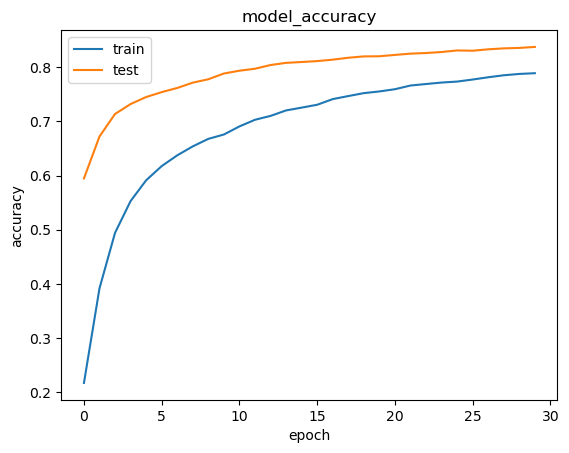

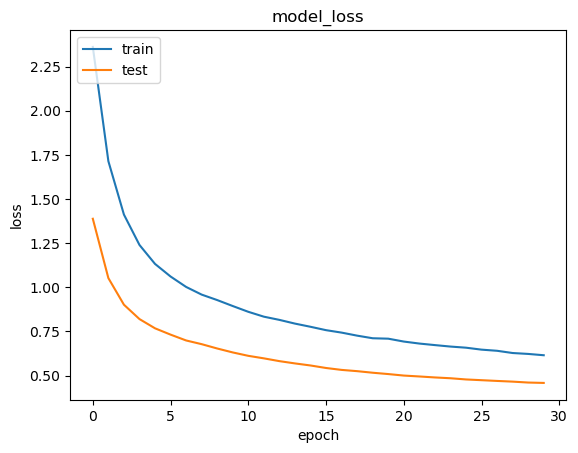

In [173]:
import matplotlib.pyplot as plt 
%matplotlib inline
# list all data in training
print (training.history.keys ())
# summarize training for accuracy
plt.plot(training.history ['accuracy'])
plt.plot (training.history ['val_accuracy' ])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='upper left') 
plt.show ()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model_loss')
plt.ylabel ('loss')
plt.xlabel ('epoch')
plt. legend(['train', 'test'], loc='upper left') 
plt.show ()

In [174]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 770us/step - loss: 0.4815 - accuracy: 0.8305
Test accuracy: 0.8305000066757202


### MODEL 6

> loss: 0.3382 - accuracy: 0.8830

In [3]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a sequential model
model_6 = tf.keras.Sequential()
N_hidden = 512

model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(N_hidden, name='dense_layer_4', activation='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(10, name='dense_layer_5', activation='softmax'))

# Use the legacy Adam optimizer with a reduced learning rate
optimizer = Adam(learning_rate=0.001)  
model_6.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model with augmented data and early stopping
training = model_6.fit(X_train, Y_train, batch_size=64, 
                       epochs=50, 
                       validation_split=0.2, 
                       callbacks=[early_stopping])


Epoch 1/50
750/750 [==============================] - 7s 9ms/step - loss: 0.6150 - accuracy: 0.7765 - val_loss: 0.4417 - val_accuracy: 0.8428
Epoch 2/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4572 - accuracy: 0.8364 - val_loss: 0.4120 - val_accuracy: 0.8512
Epoch 3/50
750/750 [==============================] - 7s 10ms/step - loss: 0.4242 - accuracy: 0.8495 - val_loss: 0.3763 - val_accuracy: 0.8597
Epoch 4/50
750/750 [==============================] - 7s 9ms/step - loss: 0.3990 - accuracy: 0.8553 - val_loss: 0.3629 - val_accuracy: 0.8670
Epoch 5/50
750/750 [==============================] - 7s 10ms/step - loss: 0.3865 - accuracy: 0.8601 - val_loss: 0.3487 - val_accuracy: 0.8722
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3706 - accuracy: 0.8659 - val_loss: 0.3475 - val_accuracy: 0.8776
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3654 - accuracy: 0.8686 - val_loss: 0.3422 - val_accuracy: 0.8773
Epoc

In [5]:
test_loss, test_accuracy = model_6.evaluate(X_test, Y_test, batch_size=64)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

157/157 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8830
Test Accuracy: 88.30%
